In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

### --- compare accuracy distribution of size ---

In [2]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [3]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain/accuracy_distribution_of_size.csv')
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512/accuracy_distribution_of_size.csv')
refinedet_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/all_size_df.csv')

In [4]:
insect_size_df

,order,count
0,7.0,15
1,8.0,181
2,9.0,189
3,10.0,84
4,11.0,50
5,12.0,38
6,13.0,47
7,14.0,16
8,15.0,3


In [5]:
all_df = refinedet_not_pretrained
all_df = all_df.rename(columns={'Accuracy': 'refinedet_not_pretrained'})
all_df = all_df.assign(refinedet_pretrained_freeze=refinedet_pretrained_freeze["Accuracy"])
all_df = all_df.assign(refinedet_pretrained=refinedet_pretrained["Accuracy"])
all_df

,order,refinedet_not_pretrained,Insect_size,order.1,refinedet_pretrained_freeze,refinedet_pretrained
0,7.0,1.000000,224.800000,7.0,0.800000,0.933333
1,8.0,1.000000,394.436464,8.0,0.944751,1.000000
2,9.0,0.978836,726.137566,9.0,0.873016,0.994709
3,10.0,0.964286,1420.392857,10.0,0.857143,0.988095
4,11.0,0.960000,2870.260000,11.0,0.880000,0.980000
5,12.0,0.894737,6288.526316,12.0,0.789474,0.973684
6,13.0,0.872340,11189.978723,13.0,0.851064,0.957447
7,14.0,0.875000,22611.437500,14.0,0.875000,1.000000
8,15.0,1.000000,37326.666667,15.0,0.333333,1.000000


(0.7, 1.01)

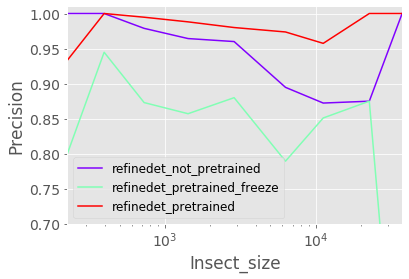

In [6]:
plt.rcParams["font.size"] = 14
all_df.plot(x="Insect_size", y=["refinedet_not_pretrained", "refinedet_pretrained_freeze", "refinedet_pretrained"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.legend(fontsize=12)
plt.ylim(0.7, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_finetuning/compare_precision_distrib_of_size.png", bbox_inches="tight")

### --- compare accuracy distribution of class ---

In [7]:
refinedet_not_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_not_pretrain/accuracy_distribution_of_class.csv')
refinedet_pretrained = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512/accuracy_distribution_of_class.csv')
refinedet_pretrained_freeze = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_freeze/each_class_df.csv')

In [8]:
all_df = refinedet_not_pretrained
all_df = all_df.rename(columns={'Precision_per_class': 'refinedet_not_pretrained'})
all_df = all_df.assign(refinedet_pretrained_freeze=refinedet_pretrained_freeze["Precision_per_class"])
all_df = all_df.assign(refinedet_pretrained=refinedet_pretrained["Precision_per_class"])
all_df

,Unnamed: 0,Name,refinedet_not_pretrained,refinedet_pretrained_freeze,refinedet_pretrained
0,0,Coleoptera,1.000000,0.500000,1.000000
1,1,Diptera,0.836364,0.763636,0.963636
2,2,Ephemeridae,0.923077,0.923077,0.923077
3,3,Ephemeroptera,1.000000,0.870968,1.000000
4,4,Lepidoptera,0.925000,0.875000,1.000000
5,5,Plecoptera,1.000000,1.000000,1.000000
6,6,Trichoptera,1.000000,1.000000,0.961538
7,7,small insect,0.981233,0.887399,0.991957
8,8,medium insect,0.987013,0.896104,1.000000


Text(0, 0.5, 'Precision')

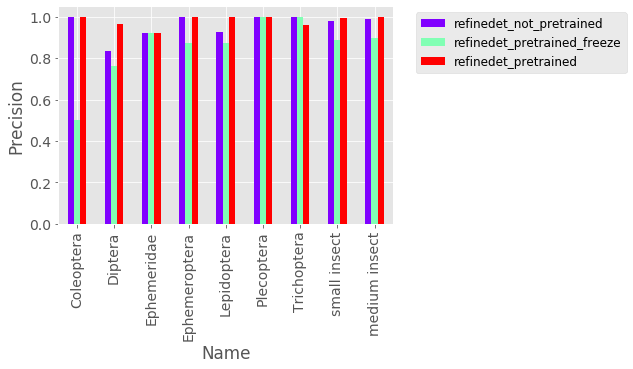

In [9]:
plt.rcParams["font.size"] = 14
all_df.plot(kind="bar", x="Name", y=["refinedet_not_pretrained", "refinedet_pretrained_freeze", "refinedet_pretrained"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_finetuning/compare_precision_per_class.png", bbox_inches="tight")